In [19]:
#import libraries
import os
import cv2
import numpy as np
import random
import itertools
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from keras.models import load_model

In [20]:
# Set data directory and categories
DATADIR = r'/Users/sivaluxan/Documents/AI/MLP/Project/FireNet-LightWeight-Network-for-Fire-Detection/Test_Dataset1__Our_Own_Dataset'
CATEGORIES = ['Fire_1', 'NoFire_1']
IMG_SIZE = 64

In [21]:
def create_training_data():
    training_data = []
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
    return training_data

In [22]:
# Load data
training_data = create_training_data()
random.shuffle(training_data)

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 163.09it/s]


In [23]:
# Prepare dataset
X = np.array([features for features, label in training_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 3) / 255.0
Y = np.array([label for _, label in training_data])

In [24]:
# Load model
model_path = r'/Users/sivaluxan/Documents/AI/MLP/Project/FireNet-LightWeight-Network-for-Fire-Detection/Trained_Model_FIreNet/Fire-detection-optimized-v2.h5'
model = load_model(model_path)

In [25]:
# Predict labels
predicted_labels = np.argmax(model.predict(X), axis=-1)

7/7 [==============================] - 0s 14ms/step


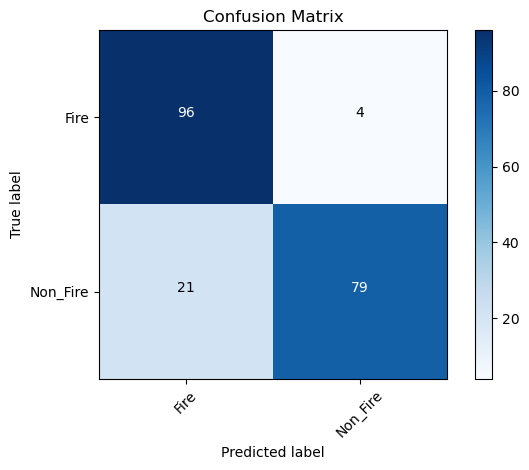

In [26]:
# Compute confusion matrix
cm = confusion_matrix(Y, predicted_labels)
cm_plot_labels = ['Fire', 'Non_Fire']

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(cm, cm_plot_labels)

In [27]:
# Calculate performance metrics
tp, fn, fp, tn = cm.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f_measure = 2 * (precision * recall) / (precision + recall)

print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f_measure:.4f}')

# Model evaluation
loss, accuracy = model.evaluate(X, Y)
print(f'Model Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

Precision: 0.8205, Recall: 0.9600, F1-score: 0.8848
7/7 [==============================] - 0s 14ms/step - loss: 0.7583 - accuracy: 0.8750
Model Loss: 0.7583, Accuracy: 0.8750
